# CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS
### Aamir Hussain

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



# Data Preparation and Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import tensorflow as tf

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

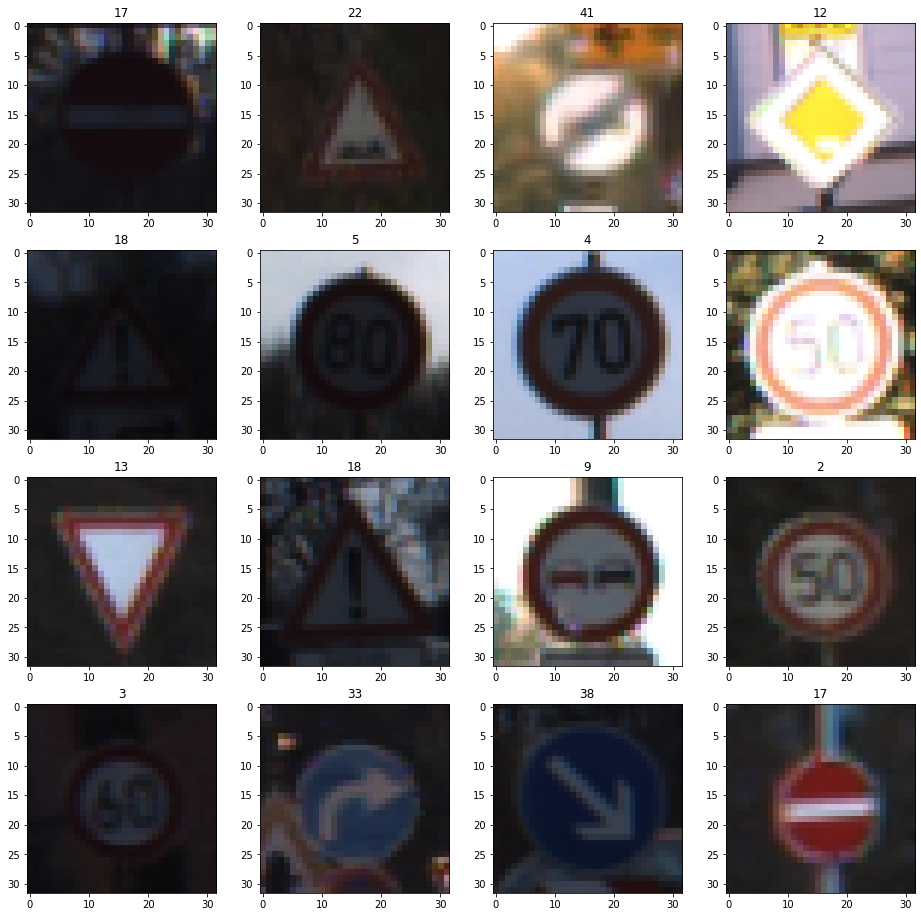

In [6]:
plt.figure(figsize=(16, 16))
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.title(y_train[i])
    plt.imshow(X_train[i])

In [7]:
# Convert the color images to grayscale and normalize the data
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

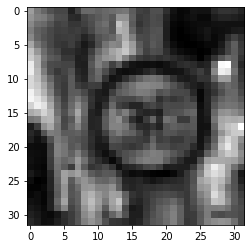

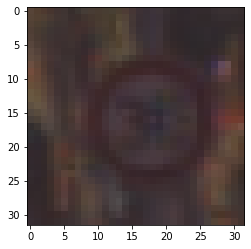

In [8]:
plt.imshow(X_train_gray[250].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[250])

# Model Building

In [10]:
image_shape = X_train_gray[i].shape
image_shape

(32, 32, 1)

In [11]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Input(shape=image_shape))

cnn.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
cnn.add(tf.keras.layers.AveragePooling2D())

cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn.add(tf.keras.layers.AveragePooling2D())

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=120, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=84, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [13]:
cnn.compile(loss ='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics =['accuracy'])
r = cnn.fit(X_train_gray_norm, y_train, epochs=50, batch_size=500, verbose=1, 
            validation_data=(X_validation_gray_norm ,y_validation))

Epoch 1/50
70/70 [==============================] - 2s 31ms/step - loss: 3.1882 - accuracy: 0.1672 - val_loss: 2.8128 - val_accuracy: 0.2941
Epoch 2/50
70/70 [==============================] - 1s 20ms/step - loss: 1.8214 - accuracy: 0.4971 - val_loss: 1.5953 - val_accuracy: 0.5449
Epoch 3/50
70/70 [==============================] - 2s 22ms/step - loss: 1.0292 - accuracy: 0.7044 - val_loss: 1.0890 - val_accuracy: 0.6977
Epoch 4/50
70/70 [==============================] - 1s 20ms/step - loss: 0.7237 - accuracy: 0.7982 - val_loss: 0.9225 - val_accuracy: 0.7145
Epoch 5/50
70/70 [==============================] - 1s 20ms/step - loss: 0.5539 - accuracy: 0.8482 - val_loss: 0.7420 - val_accuracy: 0.7880
Epoch 6/50
70/70 [==============================] - 1s 20ms/step - loss: 0.4399 - accuracy: 0.8817 - val_loss: 0.6882 - val_accuracy: 0.7998
Epoch 7/50
70/70 [==============================] - 2s 22ms/step - loss: 0.3676 - accuracy: 0.9049 - val_loss: 0.6814 - val_accuracy: 0.8202
Epoch 8/50
70

# Evaluation

In [18]:
score = cnn.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f} %'.format(score[1]  * 100))

Test Accuracy : 87.2051 %


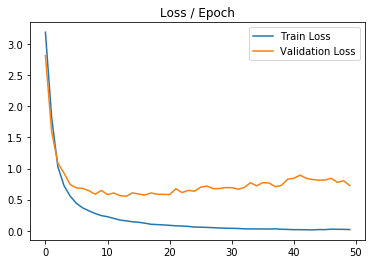

In [19]:
plt.title('Loss / Epoch')
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

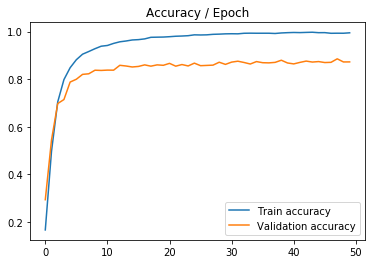

In [20]:
plt.title('Accuracy / Epoch')
plt.plot(r.history['accuracy'], label='Train accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()

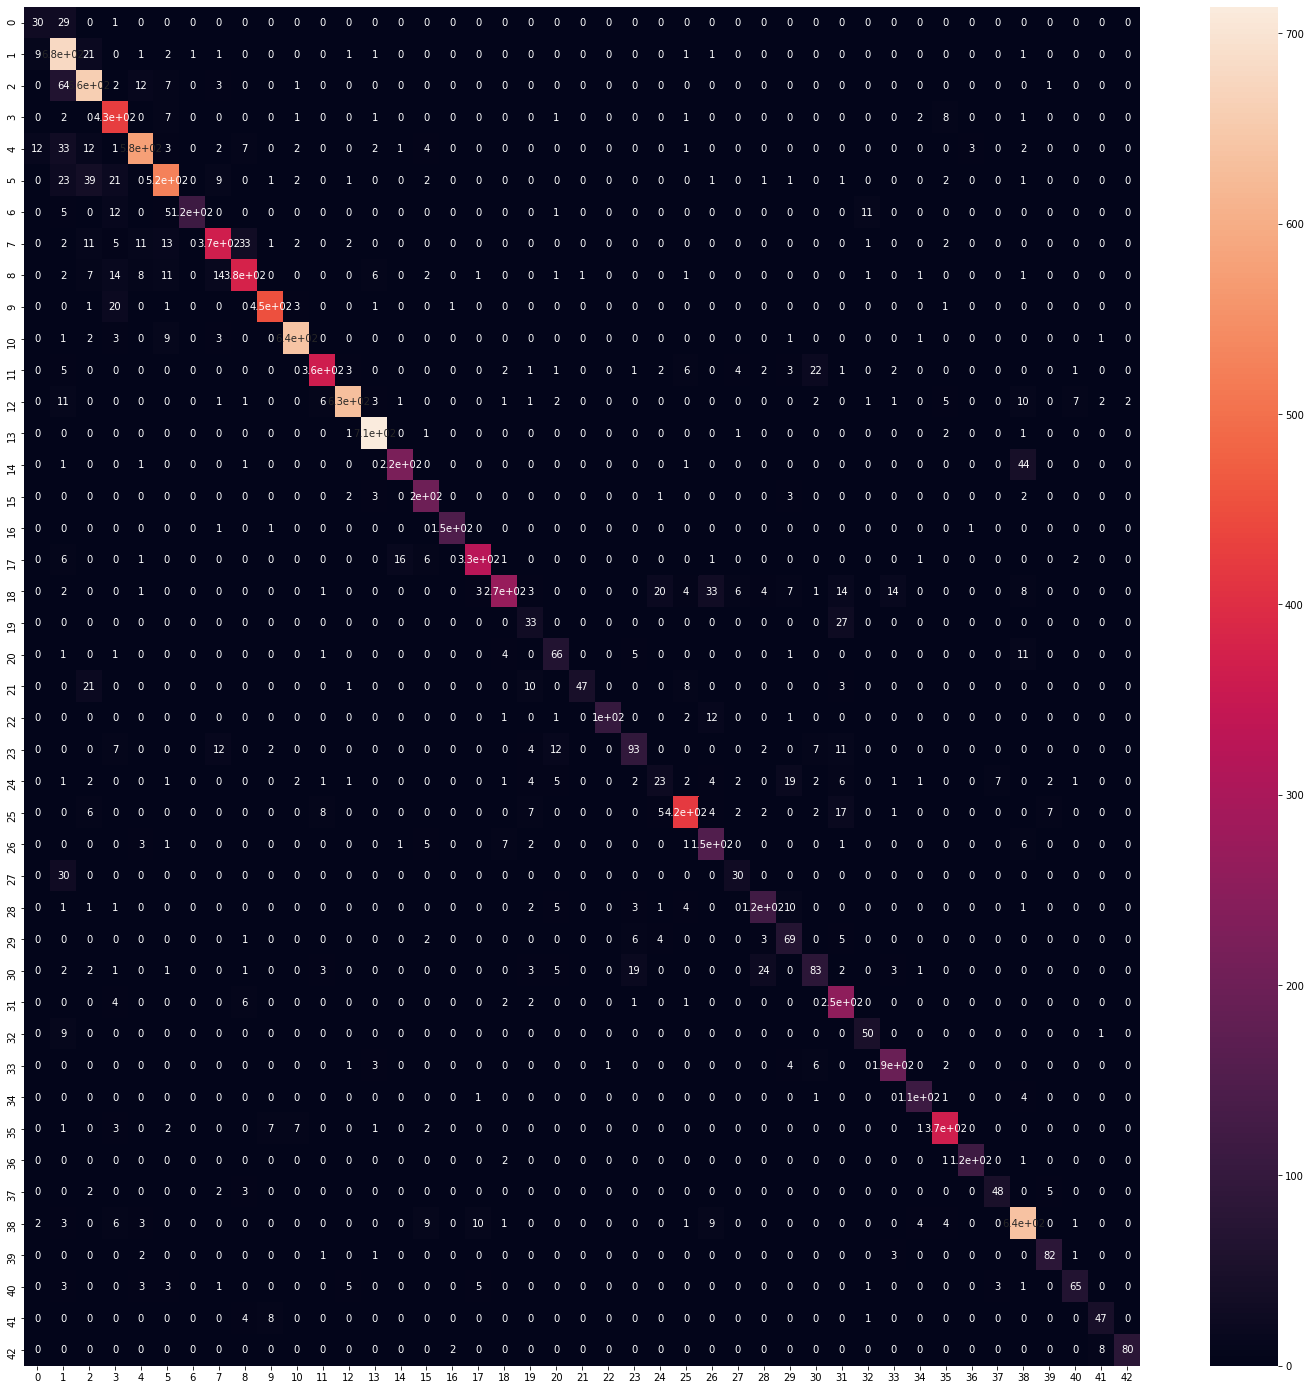

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = cnn.predict_classes(X_test_gray_norm)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)